<h1 align='center'>Assigment 3</h1>

* Dimitris Stathopoulos f3352318
* dim.stathopoulos@aueb.gr


<h1 align='center'> Classification of Handwritten
Digits</h1>

### Read the data file when in google collab:

### Read our data from data.xlsx

In [17]:
import pandas as pd

data = pd.read_excel("../data.xlsx")


c:\Users\drago\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


* azip and testzip are the matrixes with the data for all digits
* dzip and dtest contain the digits, that is our target/label digits corresponding to the azip and testzip respectively.

In [18]:
import pandas as pd

# Read data from excel sheets
dtest = pd.read_excel("../data.xlsx", sheet_name="dtest", header=None)
azip = pd.read_excel("../data.xlsx",sheet_name="azip", header=None)
dzip = pd.read_excel("../data.xlsx",sheet_name="dzip", header=None)
testzip = pd.read_excel("../data.xlsx",sheet_name="testzip", header=None)





# Display the DataFrames
display(dzip.sample(), azip.sample(), dtest.sample(), testzip.sample())


c:\Users\drago\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\drago\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\drago\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\drago\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,6,5,4,7,3,6,3,1,0,1,...,8,0,5,1,9,8,9,7,9,8


,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
38,-0.41,1.0,-1.0,-0.738,0.688,-0.118,-1.0,-1.0,0.027,-1.0,...,0.677,1.0,1.0,-1.0,0.887,0.822,0.538,-0.152,1.0,0.105


,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,9,6,3,6,6,0,0,0,6,9,...,7,5,2,0,4,3,9,4,0,1


,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
197,-1.0,0.324,-1.0,1.0,-1.0,-0.754,-0.285,-0.251,1.0,-1.0,...,-1.0,0.227,-1.0,1.0,-1.0,-0.928,-1.0,0.009,0.967,-1.0


In order to continue, we need to associate each digit(dzip and dtest) with the corresponding feature vector for azip and testzip respectively. The way we aproach this is:

* get the transpose matrixes of azip and testzip
* add the dzip and dtest as columns to the transpose "dataframes" or matrixes whatever we want to call them.

In [19]:
# Function that transposes a matrix and adds info to the dataframe
def get_T_add_digits(matrix, digit_row):
    matrix = matrix.T
    matrix['digits'] = digit_row
    return matrix

azip = get_T_add_digits(azip,dzip.iloc[0])
testzip = get_T_add_digits(testzip,dtest.iloc[0])



#### Results of this operation:

In [20]:
display(azip.head(3),testzip.head(3))


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,digits
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,digits
0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,...,-0.908,0.430,0.622,-0.973,-1.0,-1.0,-1.0,-1.0,-1.0,9
1,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,6
2,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,...,0.717,0.333,0.162,-0.393,-1.0,-1.0,-1.0,-1.0,-1.0,3


Now we initialize some functions that will help us move forward for the assignment. The key function here is the one that is calculating the SVD which given a matrix and a specified number of singular vectors(basis) provides as with the matrixes U, S, V(transpose) from the Sigular Value Decomposition matrix analysis.

It should be noted that for our case we think of matrixes to pass through SVD as the matrixes that contain all the feature vectors for each one of the digits individually. Meaning that every digit has it own matrix on which we perform SVD.

In [21]:
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report


# Function to load data from text file
def load_data(sheet_n):
    return pd.read_excel("../data.xlsx", sheet_name=sheet_n)

# Function to get a specific image
def get_digit_img(matrix, index):
    matrix = np.array(matrix)
    # Extract the specific image vector
    image_vector = matrix[:, index]
    # Reshape the image vector into a 16x16 matrix
    image_matrix = np.reshape(image_vector, (16, 16))

    return image_matrix

# Function to perform SVD on class matrices
def compute_svd(matrix):

    return np.linalg.svd(matrix)



def get_svd_data(matrix, num_basis):
    class_bases = []

    for digit in range(10):
        # Get all the rows that correspond to a specific digit
        digit_matrix = matrix[matrix.digits == digit]
        # display(f"Original Matrix shape: {digit_matrix.shape}")
        # Transpose the matrix to reach its first dimensionality
        digit_matrix = digit_matrix.iloc[:, :-1].T
        # display(f"Transpose Matrix shape: {digit_matrix.shape}")

        # Get each matrix indivitually and compute the SVD of that matrix
        U, S, Vt = compute_svd(digit_matrix)

        class_bases.append((U[:, :num_basis], S[:num_basis], Vt[:, :num_basis], digit))
    return pd.DataFrame(class_bases, columns=['U', 'S', 'Vt', 'digit'])








** Bellow there is a example of svd analysis on each of the 0-9 digits matrixes. **

In [22]:
X_train_df = get_svd_data(azip, num_basis=10)
display(X_train_df.head(3))




,U,S,Vt,digit
0,"[[0.09524000536796609, 0.010139813744881772, 0...","[184.44749843727828, 97.59388421650593, 62.050...","[[-0.04880264588956862, -0.0541644443005983, -...",0
1,"[[-0.06778397834428718, -0.008015310654923752,...","[234.04151731030635, 41.930906295592024, 24.84...","[[0.06357973289373856, 0.062071522482740726, 0...",1
2,"[[-0.10072798721358456, 0.0028173700796718937,...","[138.28369960159876, 57.397393844209475, 46.39...","[[0.06995135446232487, 0.06601460151125005, 0....",2


### **Test:** Compute 10 least squares residuals for each Test feature vector

In [23]:
print(testzip.shape)
print(testzip.T.shape)

(2007, 257)
(257, 2007)


**The correct dimensionality should be (257, 2007), so later in the code we keep the transpose rows.**

The following code computes the residual dot products for each digit using singular value decomposition (SVD) analysis. It then generates a classification report based on these dot products, providing accuracy scores and detailed performance metrics for digit classification. The SVD analysis helps identify the most significant features for classification, improving the accuracy of the model.

In [24]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


def compute_residual_dot_products(X_train_df, testzip):
    """

    :param X_train_df: DataFrame with Uk and Uk transpose for each digit
    :param testzip: DataFrame with the test data (uknown feature vectors)
    :return: dict: containing all the dot products each feature vector with each I- Uk_dot_Uk.T matrix (for each digit)
    """
    identity_matrix = np.eye(256)  # identity matrix
    residual_vec_matrices = {}  # Dictionary to store the residual vector matrices for each digit

    for digit in range(10):
        Uk_dot_Ukt = X_train_df.iloc[digit]['U'] @ X_train_df.iloc[digit]['U'].T

        residual_vec_matrix = identity_matrix - Uk_dot_Ukt
        residual_vec_matrices[digit] = residual_vec_matrix

    residual_dot_products = {}  # Dictionary to store the dot products for each digit
    for digit in range(10):
        digit_dot_products = []

        for _, row in testzip[testzip.digits == digit].iterrows():
            test_vector = row[:-1].T.values  # Extract the feature vector of the test sample
            dot_products_with_Uk = []

            min_norm = float('inf')  # Initialize minimum norm to infinity
            min_digit = None  # Initialize variable to store the digit with the smallest norm
            # Loop to create dot products between each one of the test_vectors and all Uk_dot_Ukt
            for class_digit in range(10):
                class_Uk = residual_vec_matrices[class_digit]  # derive the matrix needed
                dot_product = np.dot(test_vector, class_Uk)
                dot_products_with_Uk.append(dot_product)
            digit_dot_products.append(dot_products_with_Uk)

        residual_dot_products[digit] = digit_dot_products
    return residual_dot_products







def generate_classification_report(residual_dot_products):
    y_true = []  # List to store actual digit labels
    y_pred = []  # List to store predicted digit labels

    for digit in range(10):
        digit_dot_products = residual_dot_products[digit]

        for dot_products_with_Uk in digit_dot_products:
            min_norm = float('inf')
            min_digit = None

            for class_digit, dot_product in enumerate(dot_products_with_Uk):
                current_norm = np.linalg.norm(dot_product)
                if current_norm < min_norm:
                    min_norm = current_norm
                    min_digit = class_digit

            y_true.append(digit)  # Actual digit label
            y_pred.append(min_digit)  # Predicted digit label

    # Calculate accuracy
    class_report = classification_report(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, class_report

# Classification report calculations
residual_dot_products = compute_residual_dot_products(X_train_df, testzip)  # residual_dot_products dictionary
_, class_report = generate_classification_report(residual_dot_products)
print(class_report)




              precision    recall  f1-score   support

           0       0.95      0.98      0.96       359
           1       0.95      0.99      0.97       264
           2       0.95      0.90      0.93       198
           3       0.87      0.88      0.87       166
           4       0.94      0.92      0.93       200
           5       0.89      0.87      0.88       160
           6       0.98      0.94      0.96       170
           7       0.93      0.94      0.93       147
           8       0.93      0.87      0.90       166
           9       0.91      0.94      0.92       177

    accuracy                           0.93      2007
   macro avg       0.93      0.92      0.93      2007
weighted avg       0.93      0.93      0.93      2007



We perform the SVD classification algorithm as above but now we use variable number o singular vectors (column vectors selected from matrix U). The range of singular vectors is as specified in the exercise (5, 20).

In [25]:
import matplotlib.pyplot as plt


accuracies = []

for num_basis in range(5, 20):
    X_train_df = get_svd_data(azip, num_basis=num_basis)
    residual_dot_products = compute_residual_dot_products(X_train_df, testzip)
    accuracy,_ = generate_classification_report(residual_dot_products)
    accuracies.append((num_basis, accuracy))

# Extract the basis numbers and corresponding accuracies
basis_numbers, accuracy_values = zip(*accuracies)



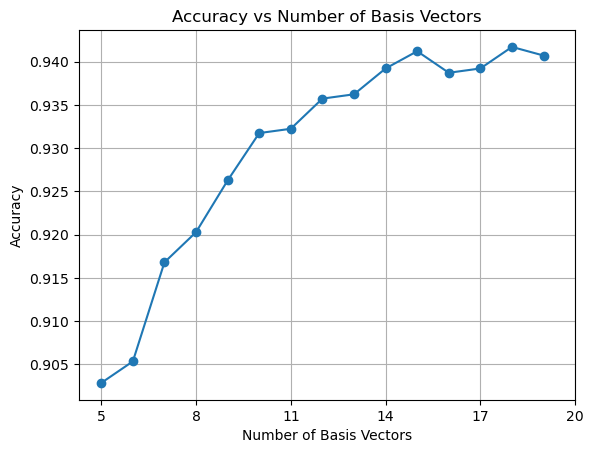

In [26]:
# Plot the results
plt.plot(basis_numbers, accuracy_values, marker='o')
plt.xlabel('Number of Basis Vectors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Basis Vectors')
plt.grid(True)

# Set integer ticks for the x-axis
plt.xticks(range(5, 21, 3))
plt.show()


2 Check if all digits are equally easy or difficult to classify. Also look at some of the 
difficult ones, and see that in many cases they are very badly written.

The following code cell analyzes the accuracy of digit classification for different numbers of basis vectors used in singular value decomposition (SVD). It iterates over a range of basis vector numbers, computes the SVD analysis, calculates the residual dot products, and then evaluates the accuracy of digit classification based on these dot products. The aim is to identify the minimum number of basis vectors required to achieve a specified minimum accuracy threshold.

In [27]:
def analyze_digit_accuracy(residual_dot_products):
    digit_accuracies = {}

    for digit in range(10):
        digit_dot_products = residual_dot_products[digit]
        correct_count = 0
        total_count = len(digit_dot_products)
        # print(f"Digit:{digit}, value counts:{total_count}")

        for dot_products_with_Uk in digit_dot_products:
            min_norm = float('inf')
            min_digit = None

            for class_digit, dot_product in enumerate(dot_products_with_Uk):
                current_norm = np.linalg.norm(dot_product)
                if current_norm < min_norm:
                    min_norm = current_norm
                    min_digit = class_digit

            if min_digit == digit:
                correct_count += 1

        accuracy = correct_count / total_count
        digit_accuracies[digit] = accuracy

    return digit_accuracies


# Loop over different numbers of basis vectors
min_accuracy = 0.90
store_accuracies_with_basis = []


for num_basis in range(5, 20):
    X_train_df = get_svd_data(azip, num_basis=num_basis)
    residual_dot_products = compute_residual_dot_products(X_train_df, testzip)
    digit_accuracies = analyze_digit_accuracy(residual_dot_products)

    # Store the digit_accuracies for each selected number of basis
    store_accuracies_with_basis.append((num_basis,digit_accuracies))


print(f"Stored accuracies: {store_accuracies_with_basis}")


Stored accuracies: [(5, {0: 0.9777158774373259, 1: 0.9621212121212122, 2: 0.8838383838383839, 3: 0.8674698795180723, 4: 0.835, 5: 0.81875, 6: 0.9411764705882353, 7: 0.9319727891156463, 8: 0.7951807228915663, 9: 0.9096045197740112}), (6, {0: 0.9721448467966574, 1: 0.9772727272727273, 2: 0.8787878787878788, 3: 0.8614457831325302, 4: 0.845, 5: 0.825, 6: 0.9352941176470588, 7: 0.9387755102040817, 8: 0.8072289156626506, 9: 0.9096045197740112}), (7, {0: 0.9777158774373259, 1: 0.9848484848484849, 2: 0.9040404040404041, 3: 0.8674698795180723, 4: 0.86, 5: 0.8375, 6: 0.9411764705882353, 7: 0.9387755102040817, 8: 0.8433734939759037, 9: 0.9152542372881356}), (8, {0: 0.9777158774373259, 1: 0.9848484848484849, 2: 0.8888888888888888, 3: 0.891566265060241, 4: 0.895, 5: 0.84375, 6: 0.9352941176470588, 7: 0.9319727891156463, 8: 0.8493975903614458, 9: 0.9096045197740112}), (9, {0: 0.9860724233983287, 1: 0.9886363636363636, 2: 0.898989898989899, 3: 0.8855421686746988, 4: 0.91, 5: 0.85625, 6: 0.94117647058

Following the mean accuracy for each digit based on the stored accuracies obtained from analyzing digit classification with different numbers of basis vectors. It first initializes a dictionary to store mean accuracies for each digit. Then, it iterates over the stored accuracies for each basis vector number, calculates the mean accuracy for each digit, and updates the mean accuracy dictionary accordingly. Finally, it prints out the mean accuracies for each digit.

In [28]:
mean_accuracies = {digit: [] for digit in range(10)}  # Dictionary to store mean accuracies for each digit

for num_basis, digit_accuracies in store_accuracies_with_basis:
    for digit, accuracy in digit_accuracies.items():
        mean_accuracies[digit].append(accuracy)

# Calculate the mean accuracy for each digit
for digit, accuracies in mean_accuracies.items():
    mean_accuracy = sum(accuracies) / len(accuracies)
    mean_accuracies[digit] = mean_accuracy

print(f"Mean accuracies: {mean_accuracies}")


Mean accuracies: {0: 0.9844011142061283, 1: 0.9828282828282826, 2: 0.8969696969696972, 3: 0.8831325301204821, 4: 0.9076666666666667, 5: 0.86, 6: 0.9458823529411765, 7: 0.9460317460317462, 8: 0.8835341365461848, 9: 0.9239171374764596}


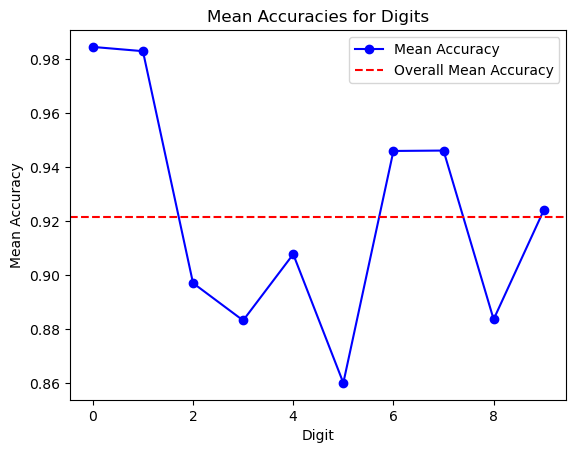

In [29]:
import matplotlib.pyplot as plt

# Extract the digits and mean accuracies from the dictionary
digits = list(mean_accuracies.keys())
accuracies = list(mean_accuracies.values())

# Compute the overall mean accuracy
overall_mean_accuracy = sum(accuracies) / len(accuracies)

# Plot the mean accuracies
plt.plot(digits, accuracies, marker='o', linestyle='-', color='b', label='Mean Accuracy')

# Plot the red point for the overall mean accuracy
plt.axhline(y=overall_mean_accuracy, linestyle='--', color='r', label='Overall Mean Accuracy')

# Add labels and legend
plt.xlabel('Digit')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracies for Digits')
plt.legend()

# Show the plot
plt.show()


The plot shows the mean accuracies for each digit, calculated over 15 different numbers of basis vectors used in the classification model. Each point on the blue line represents the average accuracy for classifying a specific digit, considering varying numbers of basis vectors.

The red dotted line represents the overall mean accuracy, which is the average of mean accuracies across all digits (0 to 9). It serves as a benchmark for comparison.

Observing the plot, if a blue point falls below the red dotted line, it indicates that the mean accuracy for classifying that digit is lower than the average accuracy across all digits. This suggests that classifying that particular digit may be more challenging compared to the overall average performance.

In summary, the graph helps visualize how the mean accuracies for individual digits compare to the overall mean accuracy, providing insights into which digits are relatively more challenging to classify in the given classification task.

Digit 5 has the lowest mean accuracy, suggesting consistent challenges in classification. Before drawing conclusions, it's essential to inspect the actual digit images in the test dataset, as they may be poorly written or inherently more difficult to classify. This investigation provides valuable context on the algorithm's performance for digit 5 and other digits with lower mean accuracies.

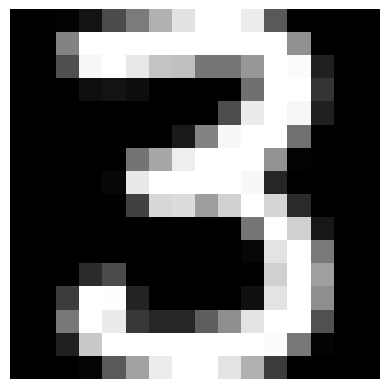

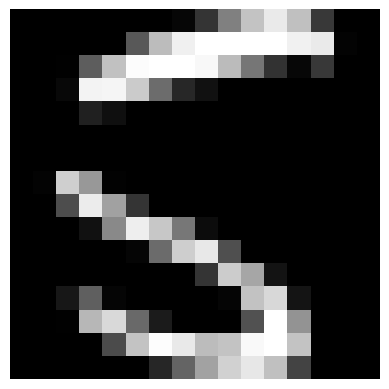

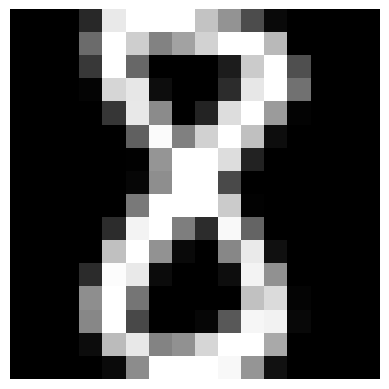

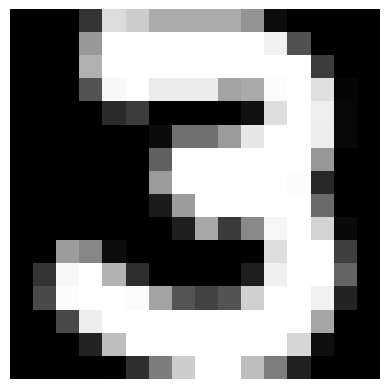

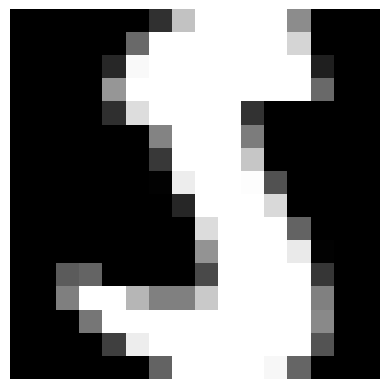

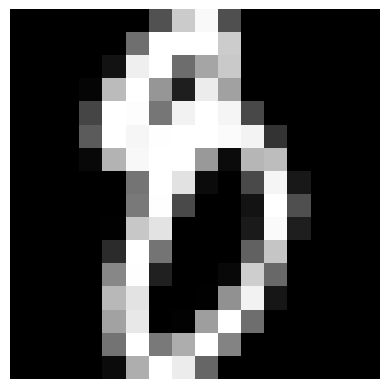

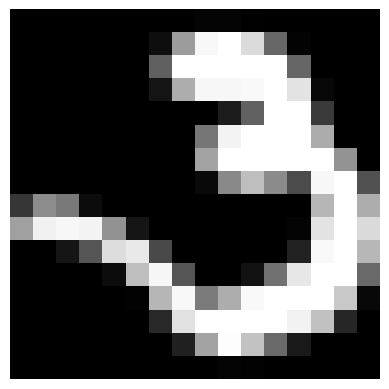

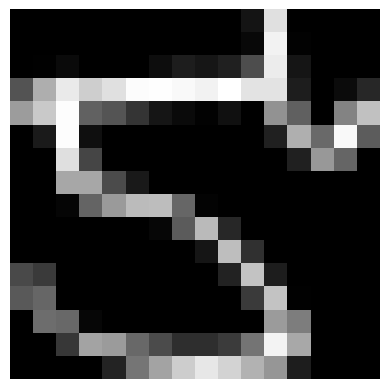

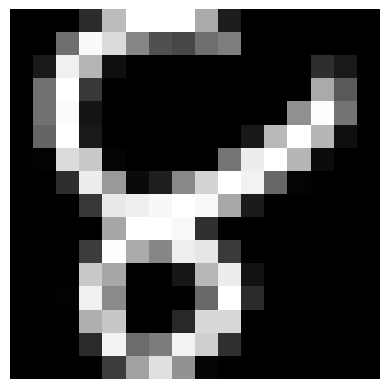

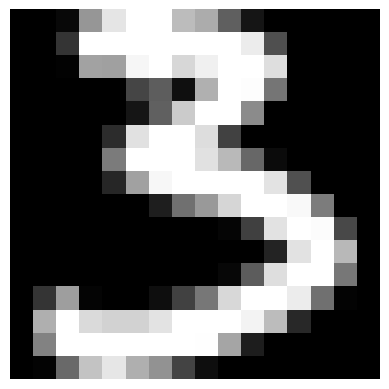

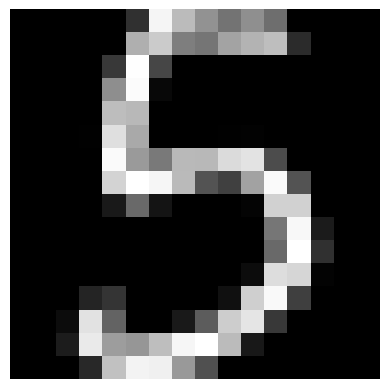

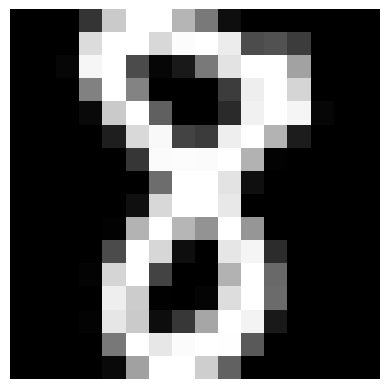

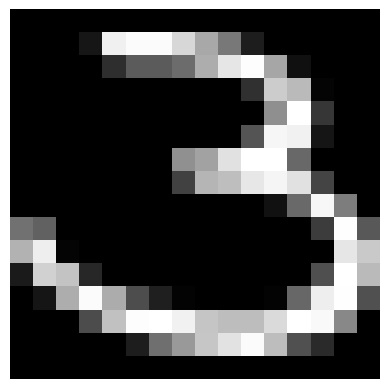

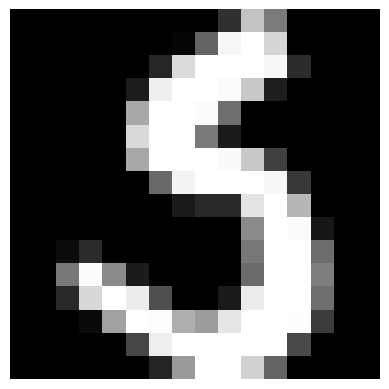

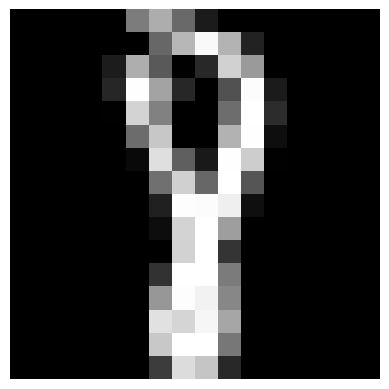

In [30]:
import numpy as np
import matplotlib.pyplot as plt
vec_test_d5 =  testzip[testzip.digits == 5].iloc[:, :-1].T.values
vec_test_d3 =  testzip[testzip.digits == 3].iloc[:, :-1].T.values
vec_test_d8 =  testzip[testzip.digits == 8].iloc[:, :-1].T.values


def display_image(image_data, index):
    # Extract the specific image vector
    image_vector = image_data[:, index]
    # Reshape the image vector into a 16x16 matrix
    image_matrix = np.reshape(image_vector, (16, 16))
    # Display the image using Matplotlib
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')
    plt.show()



num_range = range(int(80))  # For example, selecting from numbers 0 to vec_test_d5.shape[1]

# Select 10 random numbers from the range
random_numbers = np.random.choice(num_range, size=5, replace=False)

for i in random_numbers:
    display_image(np.array(vec_test_d3), i)
    display_image(np.array(vec_test_d5), i)
    display_image(np.array(vec_test_d8), i)



Here we tested the most consistently difficult to classify digits and randomly printed 5 random instances of them. It is observable that in many cases and in particular the ones representing the digit 5 are badly written.

In [31]:
part = 10
whole = 160
percentage = (part / whole) * 100
print(f"The percentage of {part} in {whole} is {percentage:.2f}%")


The percentage of 10 in 160 is 6.25%


Based on the analysis of a small sample (6.25%) of the provided images, it's evident that many of them are poorly written. This indicates that there is a subset of the data consisting of digits that are inherently challenging to classify correctly.


**3 Check the singular values of the different classes. Is it motivated to use different
numbers of basis vectors for different classes? If so, perform a few experiments
to find out if it really pays off to use fewer basis vectors in one or two of the
classes.**

In [32]:
import random
# Function that computes the SVD analysis of a matrix, but the number of singular vectors we choose is randomized
def get_svd_data_rnd_basis(matrix, num_basis_range):
    class_bases = []

    for digit in range(10):
        # Choose a random number of basis from the num_basis_range
        num_basis = random.choice(num_basis_range)
        # Get all the rows that correspond to a specific digit
        digit_matrix = matrix[matrix.digits == digit]
        # display(f"Original Matrix shape: {digit_matrix.shape}")
        # Transpose the matrix to reach its first dimensionality
        digit_matrix = digit_matrix.iloc[:, :-1].T
        # display(f"Transpose Matrix shape: {digit_matrix.shape}")

        # Get each matrix indivitually and compute the SVD of that matrix
        U, S, Vt = compute_svd(digit_matrix)

        class_bases.append((U[:, :num_basis], S[:num_basis], Vt[:, :num_basis], digit))
    return pd.DataFrame(class_bases, columns=['U', 'S', 'Vt', 'digit'])


accuracies_list = []

for iter in range(3000):
    X_train_df = get_svd_data_rnd_basis(azip, num_basis_range=(5,20))
    residual_dot_products = compute_residual_dot_products(X_train_df, testzip)
    accuracy, _ = generate_classification_report(residual_dot_products)
    accuracies_list.append((iter, accuracy))






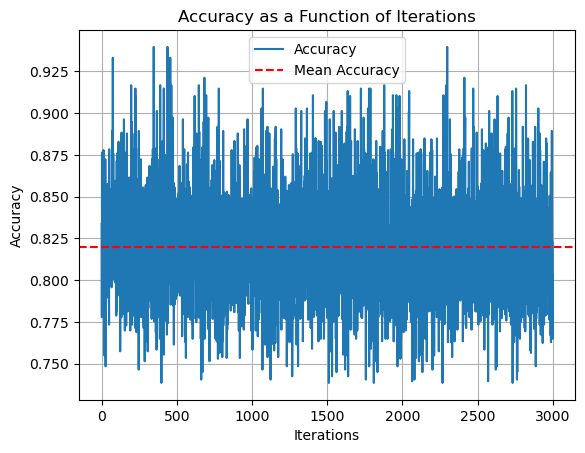

In [33]:
# Extract iterations and accuracies from the accuracies_list
iterations, accuracies = zip(*accuracies_list)

# Calculate the mean accuracy
mean_accuracy = np.mean(accuracies)

# Plot the accuracies as a function of iterations
plt.plot(iterations, accuracies, label='Accuracy')
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Iterations')
plt.grid(True)
plt.legend()
plt.show()


There is a considerable amount of predicted accuracies that approach and pass the 0.90 threshold, which is considered valid based on the scores achieved during the algorithm tuning process. Next, we will investigate the effect of randomly assigning a different number of basis vectors to two of the digits.

**Select different basis for 2 of the digits**

In [34]:
import random

def get_svd_data_diff_basis(matrix, num_basis_range, digits_with_diff_basis=None, num_basis_diff=None):
    class_bases = []

    for digit in range(10):
        # Choose a random number of basis from the num_basis_range
        if digits_with_diff_basis and digit in digits_with_diff_basis:
            num_basis = num_basis_diff
        else:
            num_basis = random.choice(num_basis_range)

        # Get all the rows that correspond to a specific digit
        digit_matrix = matrix[matrix.digits == digit]
        # Transpose the matrix to reach its first dimensionality
        digit_matrix = digit_matrix.iloc[:, :-1].T

        # Get each matrix individually and compute the SVD of that matrix
        U, S, Vt = compute_svd(digit_matrix)

        class_bases.append((U[:, :num_basis], S[:num_basis], Vt[:, :num_basis], digit))

    return pd.DataFrame(class_bases, columns=['U', 'S', 'Vt', 'digit'])



accuracies_list = []

for iter in range(1000):
    X_train_df = get_svd_data_diff_basis(azip, num_basis_range=(5,20), digits_with_diff_basis=[0,1], num_basis_diff=10)
    residual_dot_products = compute_residual_dot_products(X_train_df, testzip)
    accuracy, _ = generate_classification_report(residual_dot_products)
    accuracies_list.append((iter, accuracy))

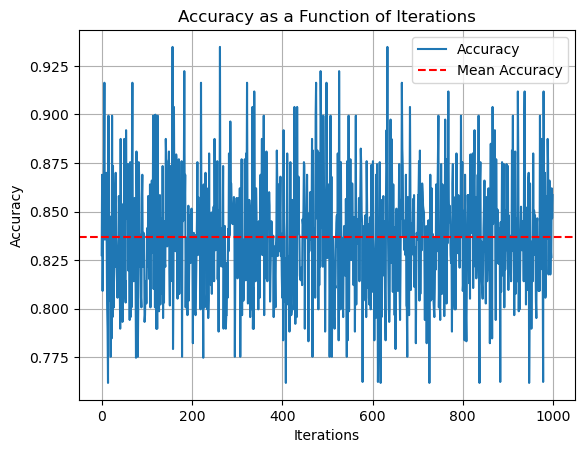

In [35]:
# Extract iterations and accuracies from the accuracies_list
iterations, accuracies = zip(*accuracies_list)

# Calculate the mean accuracy
mean_accuracy = np.mean(accuracies)

# Plot the accuracies as a function of iterations
plt.plot(iterations, accuracies, label='Accuracy')
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Iterations')
plt.grid(True)
plt.legend()
plt.show()


In summary, when analyzing whether the algorithm is motivated to use different bases, it's evident that in numerous iterations, the accuracy achieves significant highs. Therefore, it can be inferred that in some instances, the algorithm is indeed motivated to utilize different bases for one or two of the classes.

## TWO-STAGE ALGORITHM WITH SVD

The classification report for digit classification using only the first singular vector as the basis. It first computes the residual dot products between the test vectors and the first singular vectors of each digit. Then, it generates the classification report based on the minimum norms obtained from these dot products. Finally, it prints out the classification report.

In [36]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

X_train_df = get_svd_data(azip, num_basis=20)
display(X_train_df.head(3))


def compute_first_residual_dot_products(X_train_df, testzip):
    """

    :param X_train_df: DataFrame with Uk and Uk transpose for each digit
    :param testzip: DataFrame with the test data (uknown feature vectors)
    :return: dict: containing all the dot products each feature vector with each I- Uk_dot_Uk.T matrix (for each digit)
    """
    identity_matrix = np.eye(256)  # identity matrix
    residual_vec_matrices = {}  # Dictionary to store the residual vector matrices for each digit

    for digit in range(10):
        Uk_dot_Ukt = X_train_df.iloc[digit]['U'][:, :1] @ X_train_df.iloc[digit]['U'][:, :1].T # Select specific number of singular vectors (basis)

        residual_vec_matrix = identity_matrix - Uk_dot_Ukt
        residual_vec_matrices[digit] = residual_vec_matrix

    residual_dot_products = {}  # Dictionary to store the dot products for each digit
    for digit in range(10):
        digit_dot_products = []

        for _, row in testzip[testzip.digits == digit].iterrows():
            test_vector = row[:-1].T.values  # Extract the feature vector of the test sample
            dot_products_with_Uk = []

        
            # Loop to create dot products between each one of the test_vectors and all Uk_dot_Ukt
            for class_digit in range(10):
                class_Uk = residual_vec_matrices[class_digit]  # derive the matrix needed
                dot_product = np.dot(test_vector, class_Uk)
                dot_products_with_Uk.append(dot_product)
            digit_dot_products.append(dot_products_with_Uk)

        residual_dot_products[digit] = digit_dot_products
    return residual_dot_products



def generate_classification_report(residual_dot_products):
    y_true = []  # List to store actual digit labels
    y_pred = []  # List to store predicted digit labels

    for digit in range(10):
        digit_dot_products = residual_dot_products[digit]

        for dot_products_with_Uk in digit_dot_products:
            min_norm = float('inf')
            min_digit = None

            for class_digit, dot_product in enumerate(dot_products_with_Uk):
                current_norm = np.linalg.norm(dot_product)
                if current_norm < min_norm:
                    min_norm = current_norm
                    min_digit = class_digit

            y_true.append(digit)  # Actual digit label
            y_pred.append(min_digit)  # Predicted digit label

    # Calculate accuracy
    class_report = classification_report(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, class_report

# Classification report calculations
residual_dot_products = compute_first_residual_dot_products(X_train_df, testzip)  # residual_dot_products dictionary
_, class_report = generate_classification_report(residual_dot_products)
print(class_report)




,U,S,Vt,digit
0,"[[0.09524000536796609, 0.010139813744881772, 0...","[184.44749843727828, 97.59388421650593, 62.050...","[[-0.04880264588956862, -0.0541644443005983, -...",0
1,"[[-0.06778397834428718, -0.008015310654923752,...","[234.04151731030635, 41.930906295592024, 24.84...","[[0.06357973289373856, 0.062071522482740726, 0...",1
2,"[[-0.10072798721358456, 0.0028173700796718937,...","[138.28369960159876, 57.397393844209475, 46.39...","[[0.06995135446232487, 0.06601460151125005, 0....",2


              precision    recall  f1-score   support

           0       0.87      0.82      0.85       359
           1       0.88      0.98      0.93       264
           2       0.90      0.70      0.78       198
           3       0.74      0.79      0.76       166
           4       0.70      0.73      0.72       200
           5       0.78      0.69      0.74       160
           6       0.76      0.85      0.81       170
           7       0.84      0.83      0.83       147
           8       0.75      0.75      0.75       166
           9       0.73      0.76      0.74       177

    accuracy                           0.80      2007
   macro avg       0.79      0.79      0.79      2007
weighted avg       0.80      0.80      0.80      2007



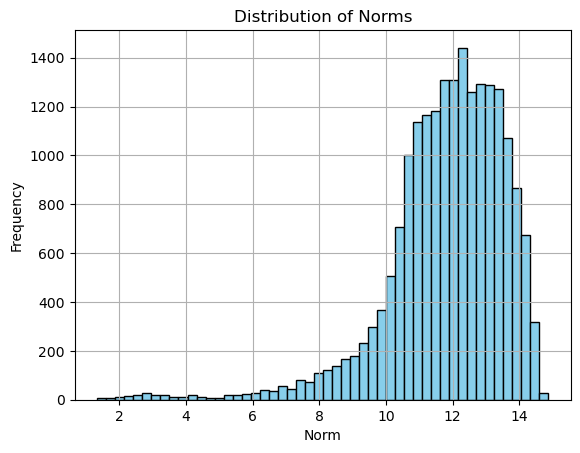

Minimum Norm: 1.3475231053004288


In [37]:
# Collect all norms into a list
all_norms = []

for digit_dot_products in residual_dot_products.values():
    for dot_products_with_Uk in digit_dot_products:
        for dot_product in dot_products_with_Uk:
            # Compute the norm of the dot product vector
            norm = np.linalg.norm(dot_product)
            all_norms.append(norm)

# Plot the distribution of norms
plt.hist(all_norms, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Norm')
plt.ylabel('Frequency')
plt.title('Distribution of Norms')
plt.grid(True)
plt.show()

# Find the minimum norm
min_norm = min(all_norms)
print(f"Minimum Norm: {min_norm}")


Now we have a rough understanding on how the classification takes place (in respect to the vector norms) we can implement the two-staged algorithm.

In [38]:
def generate_classification_report_min_norm(first_col_residual_dot_products, all_col_residual_dot_products):
    y_true = []  # List to store actual digit labels
    y_pred = []  # List to store predicted digit labels
    total_iterations = 0  # Variable to track the total number of iterations
    use_all_basis_count = 0  # Variable to track the number of times the second stage is executed
    
    for digit in range(10):
        digit_dot_products = first_col_residual_dot_products[digit]
        
        for dot_products_with_Uk in digit_dot_products:
            min_norm = float('inf')
            min_digit = None
            all_norms = []  # List to store all norms encountered
            use_all_basis = True  # Flag variable to indicate whether to use all basis or not

            for class_digit, dot_product in enumerate(dot_products_with_Uk):
                current_norm = np.linalg.norm(dot_product)
                all_norms.append(current_norm)  # Store all norms

            # Check if any norm is at least 10% smaller than the minimum norm
            mean_norms = np.mean(all_norms)
            for class_digit, current_norm in enumerate(all_norms):
                if current_norm < mean_norms * 0.8:
                    min_norm = current_norm
                    min_digit = class_digit
                    use_all_basis = False  # Set the flag to False since we found a suitable norm
            
            # Increment the total iterations count
            total_iterations += 1
            
            # If use_all_basis is False, increment the count for second stage execution
            if not use_all_basis:
                use_all_basis_count += 1
                
            # If no norm is at least 20% smaller than all the others, default back to the first algorithm
            if use_all_basis:
                all_basis_dot_products = all_col_residual_dot_products[digit]
                for dot_products_with_Uk in all_basis_dot_products:
                    min_norm = float('inf')
                    min_digit = None
                    for class_digit, dot_product in enumerate(dot_products_with_Uk):
                        current_norm = np.linalg.norm(dot_product)
                        if current_norm < min_norm:
                            min_norm = current_norm
                            min_digit = class_digit

            y_true.append(digit)
            y_pred.append(min_digit)
        
        print(f"Digit is: {digit}")

    # Calculate the percentage of times the second stage is executed
    use_all_basis_percentage = (use_all_basis_count / total_iterations) * 100 if total_iterations != 0 else 0
    
    # Calculate accuracy
    class_report = classification_report(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    return accuracy, class_report, use_all_basis_percentage

# Classification report calculations
first_vec_residual_dot_products = compute_first_residual_dot_products(X_train_df, testzip)  # residual_dot_products dictionary
all_basis_residual_dot_products = compute_residual_dot_products(X_train_df, testzip)
accuracy, class_report, use_all_basis_percentage = generate_classification_report_min_norm(first_vec_residual_dot_products, all_basis_residual_dot_products)
print("Classification Report:")
print(class_report)
print(f"Accuracy: {accuracy: .2f}")
print(f"Percentage of times second stage executed: {use_all_basis_percentage:.2f}%")


Digit is: 0
Digit is: 1
Digit is: 2
Digit is: 3
Digit is: 4
Digit is: 5
Digit is: 6
Digit is: 7
Digit is: 8
Digit is: 9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       359
           1       0.96      1.00      0.98       264
           2       1.00      0.96      0.98       198
           3       0.99      1.00      1.00       166
           4       0.95      0.81      0.88       200
           5       1.00      0.99      0.99       160
           6       0.95      1.00      0.97       170
           7       0.98      0.68      0.80       147
           8       0.98      0.98      0.98       166
           9       0.66      0.94      0.78       177

    accuracy                           0.94      2007
   macro avg       0.95      0.93      0.93      2007
weighted avg       0.95      0.94      0.94      2007

Accuracy:  0.94
Percentage of times second stage executed: 57.65%


In the above results we demostrated that it is indeed posible to derive desirable results(sufficient accuracy). It should be noted that the second stage of the algorithm, that is, our first SVD implementation from the previous questions of this project, was used in 57% of the total iterations. This indicates that the second part not only was needed and therefore frequent, but it was one essential part to derive sufficient results of the Two-Staged Algorithm we used.